In [3]:
# Import libraries
import sys
import os

In [4]:
MYPREFIX='/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI'
CWD = os.getcwd()
sys.path.append(MYPREFIX)
! echo $PWD

/talos/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/tests


In [5]:
from compositionspace.datautils import Prepare_data
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import Composition_clustering
from compositionspace.postprocessing import Postprocess_data

In [6]:
experiment_param = json.load(open("experiment_params.json","r"))


In [7]:
try:
    experiment_param = json.load(open("experiment_params.json","r"))
except:
    ValueError("Could not read parameter file")

In [8]:
Prepare_data = Prepare_data(params=experiment_param)


In [7]:
Prepare_data.get_big_slices()


  0%|          | 0/3 [00:00<?, ?it/s]

Done, reading *.APT file


100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


In [9]:
Prepare_data.get_voxels()


  0%|          | 0/10 [00:00<?, ?it/s]/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/compositionspace/datautils.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["vox_file"] = [name_sub_file for n_file in range(len(x))]

100%|██████████| 2/2 [08:12<00:00, 246.45s/it]


In [10]:
Prepare_data.get_voxels()
Prepare_data.get_voxel_composition()


100%|██████████| 238395/238395 [03:17<00:00, 1207.27it/s]


In [12]:
Composition_Space = Composition_clustering(params=experiment_param)


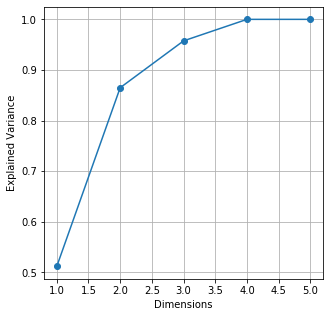

array([0.5116405 , 0.86487543, 0.95748953, 1.        , 1.        ])

In [13]:
Composition_Space.get_PCA_cumsum()


100%|██████████| 9/9 [00:55<00:00,  6.19s/it]


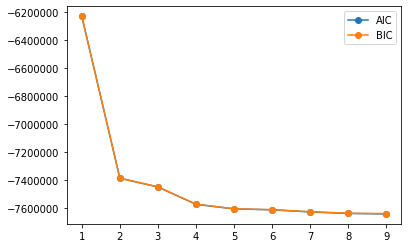

(10,
 [-6231311.162407463,
  -7389077.069220333,
  -7451711.128824832,
  -7575362.7428852515,
  -7608658.3374897735,
  -7615096.547525345,
  -7630129.594375061,
  -7641024.217222089,
  -7644347.163478269],
 [-6231103.528722648,
  -7388651.420166461,
  -7451067.464401903,
  -7574501.0630932655,
  -7607578.642328731,
  -7613798.836995246,
  -7628613.868475904,
  -7639290.475953875,
  -7642395.406840999])

In [14]:
Composition_Space.get_bics_minimization()


In [15]:
ml_params = experiment_param["parameters"]["ml_models"]["GaussianMixture"]
Composition_Space.get_composition_clusters(ml_params=ml_params)




[23144, 42173, 173078]


100%|██████████| 238395/238395 [02:53<00:00, 1377.58it/s]


In [16]:
Composition_Space.plot3d()

/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_0
/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_1


In [17]:
Postprocess_data = Postprocess_data(params=experiment_param)


/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/compositionspace/postprocessing.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cent["ID"] = [i]*len(cl_cent)
100%|██████████| 13/13 [00:00<00:00, 1644.23it/s]


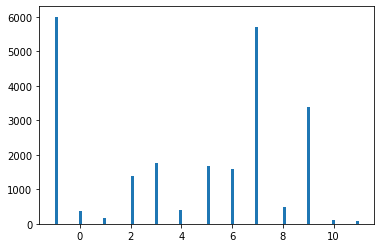

In [18]:
Postprocess_data.DBSCAN_clustering(cluster_id = 0,eps = 5., min_samples= 40,plot=True,plot3d=True,save=True)
